In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
sns.set_palette("bwr")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/MyDrive/1_Internship/Internship

/content/gdrive/MyDrive/1_Internship/Internship


In [4]:
ls

diabetes_data_upload.csv  Internship.pptx  Internship_Project.ipynb  Report.pdf


# **Taking a look on our dataset**

In [5]:
df = pd.read_csv("diabetes_data_upload.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [6]:
df.describe(include="all")

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# **Data** **Preprocessing**


In [16]:
{column: len(df[column].unique()) for column in df.columns}

{'Age': 51,
 'Gender': 2,
 'Polyuria': 2,
 'Polydipsia': 2,
 'sudden weight loss': 2,
 'weakness': 2,
 'Polyphagia': 2,
 'Genital thrush': 2,
 'visual blurring': 2,
 'Itching': 2,
 'Irritability': 2,
 'delayed healing': 2,
 'partial paresis': 2,
 'muscle stiffness': 2,
 'Alopecia': 2,
 'Obesity': 2,
 'class': 2}

**Dividing dataset into training and test set**

In [17]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Binary-encode Gender column
    df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
    
    # Binary-encode the symptom columns
    for column in df.columns.drop(['Age', 'Gender', 'class']):
        df[column] = df[column].replace({'No': 0, 'Yes': 1})
    
    # Split df into X and Y
    y = df['class']
    x = df.drop('class', axis=1)
    
    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = pd.DataFrame(scaler.transform(x_train), index=x_train.index, columns=x_train.columns)
    x_test = pd.DataFrame(scaler.transform(x_test), index=x_test.index, columns=x_test.columns)
    
    return x_train, x_test, y_train, y_test

In [18]:
x_train, x_test,y_train, y_test = preprocess_inputs(df)

In [19]:
x_train


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
201,-1.657346,0.766672,-1.0,-0.886232,1.196975,-1.202938,-0.903656,-0.558841,-0.869065,-0.957628,-0.581051,-0.930307,-0.877618,-0.739235,-0.739235,-0.445923
92,-0.657531,-1.304338,1.0,1.128372,1.196975,0.831298,-0.903656,-0.558841,1.150662,-0.957628,-0.581051,1.074914,1.139448,1.352750,-0.739235,-0.445923
344,1.092146,-1.304338,1.0,-0.886232,-0.835440,-1.202938,1.106616,-0.558841,-0.869065,-0.957628,1.721019,-0.930307,-0.877618,-0.739235,1.352750,-0.445923
119,-1.157438,-1.304338,1.0,1.128372,-0.835440,0.831298,-0.903656,-0.558841,-0.869065,-0.957628,1.721019,-0.930307,-0.877618,1.352750,-0.739235,-0.445923
221,-0.407577,0.766672,-1.0,-0.886232,-0.835440,0.831298,-0.903656,1.789419,-0.869065,1.044247,-0.581051,1.074914,-0.877618,-0.739235,1.352750,-0.445923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.009013,0.766672,1.0,1.128372,1.196975,0.831298,-0.903656,-0.558841,-0.869065,1.044247,-0.581051,-0.930307,1.139448,-0.739235,1.352750,-0.445923
144,1.675372,0.766672,1.0,1.128372,-0.835440,-1.202938,1.106616,-0.558841,1.150662,1.044247,1.721019,-0.930307,1.139448,-0.739235,-0.739235,-0.445923
72,1.425418,-1.304338,-1.0,-0.886232,-0.835440,-1.202938,-0.903656,1.789419,-0.869065,-0.957628,-0.581051,-0.930307,-0.877618,-0.739235,-0.739235,-0.445923
235,-1.823982,0.766672,-1.0,-0.886232,-0.835440,-1.202938,-0.903656,-0.558841,-0.869065,-0.957628,-0.581051,-0.930307,-0.877618,-0.739235,-0.739235,-0.445923


In [20]:
y_train

201    Negative
92     Positive
344    Positive
119    Positive
221    Negative
         ...   
129    Positive
144    Positive
72     Positive
235    Negative
37     Positive
Name: class, Length: 416, dtype: object

# **Training of Dataset**

In [22]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                        Neural Network": MLPClassifier(),
    "                         XGBClassifier": XGBClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                      VotingClassifier": VotingClassifier(estimators = [('Logistic Regression',LogisticRegression()), 
                                                                             ('Decision Tree', DecisionTreeClassifier()), 
                                                                             ('Neural Network', MLPClassifier()), 
                                                                             ('XGBClassifier', XGBClassifier()),
                                                                             ('Random Forest', RandomForestClassifier())
                                                                             ],voting = 'soft')
}
for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained !")


                   Logistic Regression trained !
                         Decision Tree trained !


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


                        Neural Network trained !
                         XGBClassifier trained !
                         Random Forest trained !


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


                      VotingClassifier trained !


In [23]:
results_base = {}
for name, model in models.items():
    results_base[name] = a = float(' {:.2f}'.format(model.score(x_test, y_test) * 100))
    print(name , ' {:.2f}'.format(results_base[name]),"%")


                   Logistic Regression  92.31 %
                         Decision Tree  97.12 %
                        Neural Network  98.08 %
                         XGBClassifier  97.12 %
                         Random Forest  98.08 %
                      VotingClassifier  98.08 %


In [24]:
results_base

{'                   Logistic Regression': 92.31,
 '                         Decision Tree': 97.12,
 '                        Neural Network': 98.08,
 '                         XGBClassifier': 97.12,
 '                         Random Forest': 98.08,
 '                      VotingClassifier': 98.08}

# **Predicting data**

We'll also take a look at the confusion matrix of each model.

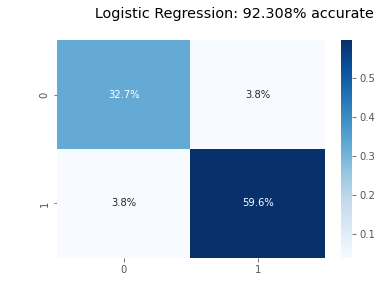

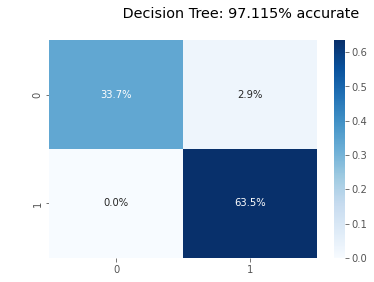

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


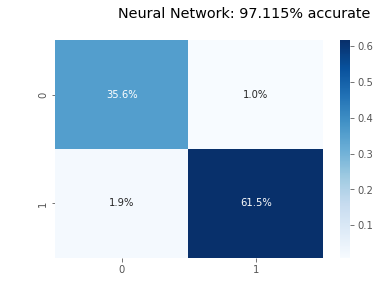

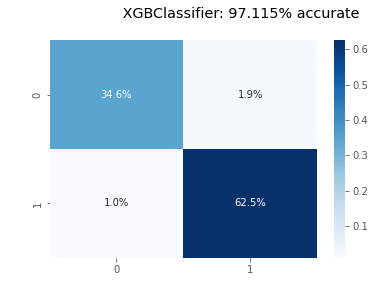

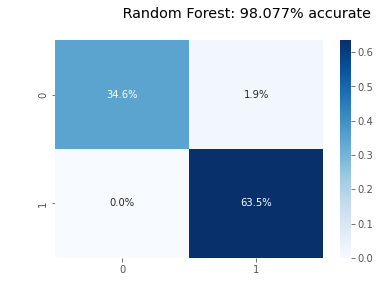

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


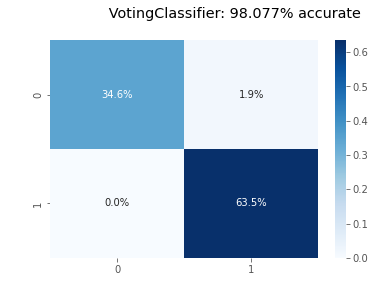

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    confuse = confusion_matrix(y_test, predict)
    accur = accuracy_score(y_test, predict)
    results[name] = (accur * 100.0)
    
    title = name + ": " + "{:.3f}%".format(accur*100) + " accurate\n"
    ax = sns.heatmap(confuse/np.sum(confuse), annot=True, fmt='.1%', cmap="Blues")
    ax.set_title(title)
    plt.show()

In [26]:
results


{'                   Logistic Regression': 92.3076923076923,
 '                         Decision Tree': 97.11538461538461,
 '                        Neural Network': 97.11538461538461,
 '                         XGBClassifier': 97.11538461538461,
 '                         Random Forest': 98.07692307692307,
 '                      VotingClassifier': 98.07692307692307}

# **Comparing performance with baseline**

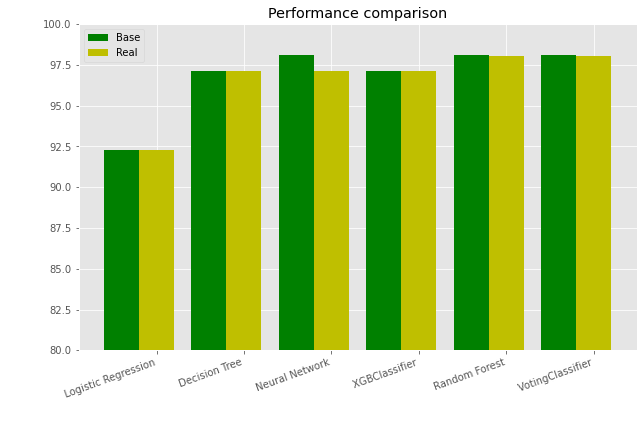

In [27]:
x = np.arange(len(results))

plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.bar(x, results_base.values(), width=0.4, color="g", align="center")
ax.bar(x + 0.4, results.values(), width=0.4, color="y", align="center")

ax.legend(("Base", "Real"))
plt.ylim((80, 100))
plt.xticks(x+ 0.4, results.keys())
plt.title("Performance comparison")
plt.xticks(rotation=20, horizontalalignment="right")
plt.show()

**Conclusion**

So, in this notebook, I experimented with different features selection methods and models. After comparing the models above, the best models for predicting diabetes in this dataset are Decision Tree, Neural Network and Random Forest. 

The best accuracy I can get Decision Tree, Neural Network and Random Forest, all with 98.07% accuracy with feature selection using voting classifier.
